In [1]:
pwd

'C:\\Users\\cgage'

In [2]:
cd /Users/cgage/Documents

C:\Users\cgage\Documents


In [3]:
#Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 100)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

import mpl_toolkits
# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [4]:
# Read in data into a dataframe 
data = pd.read_csv('ny_building.csv')

# Display top of dataframe
data.head()

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6,220-220,3,13-13,100-100,0,70928,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,0,0-0,0,43559,100-100,0,23220,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9,641-641,8,32-32,100-100,1402000,274922,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16,0-0,0,21-21,100-100,85956,322641,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76,641-641,66,40-40,50-50,0,37696,13902,1.000000


In [5]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 18 columns):
FolioNumber                 1719 non-null int64
LotAreaFeet                 1719 non-null int64
MaxCommercialAreaAllowed    1719 non-null float64
MaxOfficeAreaAllowed        1719 non-null float64
zoneClass                   1719 non-null object
PotentialPropertySize       1719 non-null int64
MaxLotCoverageArea          1719 non-null int64
MaxBuildingFootprint        1719 non-null int64
PrincipalMaxHeight          1719 non-null object
LodgingCapacity             1719 non-null int64
DensityNet                  1719 non-null object
DensityUnits                1719 non-null int64
TotalBuidingHeight          1719 non-null object
LotCoverage                 1719 non-null object
ExistingPropertySize        1719 non-null int64
LotSize                     1719 non-null int64
CalculatedLotSize           1719 non-null int64
RDScore                     1719 non-null float64
dtypes: float64(3)

In [6]:
data.describe()

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,LodgingCapacity,DensityUnits,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
count,1719.000000,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1719.000000,1719.000000,1.719000e+03,1.719000e+03,1.719000e+03,1719.000000
mean,860.000000,7.096325e+04,4.698171e+05,4.698171e+05,6.201980e+05,5.313818e+04,5.301086e+04,924.165212,680.897033,4.009797e+05,7.555179e+04,5.462839e+04,-0.069613
std,496.376873,1.327859e+05,8.766826e+05,8.766826e+05,1.046188e+06,1.124793e+05,1.177810e+05,1594.433329,1366.111543,5.320524e+05,5.593995e+05,1.042861e+05,6.145184
min,1.000000,6.540000e+02,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,9.880000e+02,-248.910873
25%,430.500000,2.526700e+04,1.339095e+05,1.339095e+05,2.149440e+05,1.720650e+04,1.615250e+04,329.000000,211.000000,1.088445e+05,2.344300e+04,2.290050e+04,-0.266602
50%,860.000000,4.046000e+04,2.632680e+05,2.632680e+05,3.575550e+05,2.764700e+04,2.677800e+04,550.000000,383.000000,2.572470e+05,3.230800e+04,3.091800e+04,0.251307
75%,1289.500000,6.722800e+04,5.034005e+05,5.034005e+05,6.341385e+05,4.893500e+04,4.673650e+04,978.000000,699.000000,4.904585e+05,5.678250e+04,5.080600e+04,0.658362
max,1719.000000,2.700340e+06,1.725727e+07,1.725727e+07,1.725727e+07,2.700340e+06,2.700340e+06,28760.000000,20954.000000,8.942176e+06,2.277234e+07,2.697688e+06,1.000000


In [7]:

# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(data)


Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
df = pd.read_csv('ny_building.csv')
df

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6,220-220,3,13-13,100-100,0,70928,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,0,0-0,0,43559,100-100,0,23220,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9,641-641,8,32-32,100-100,1402000,274922,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16,0-0,0,21-21,100-100,85956,322641,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76,641-641,66,40-40,50-50,0,37696,13902,1.000000
5,6,1583,7766.0,7766.0,R8--/R8-B/R10--,7766,1517,1583,0-10,12,256-0,11,0-10,100-0,328352,21988,22944,-41.280711
6,7,2092,16738.0,16738.0,M2-3,16738,2092,2092,13-13,0,0-0,0,13-13,100-100,0,174201,2090,1.000000
7,8,2285,27733.0,27733.0,M2-3,27733,2285,2285,13-13,0,0-0,0,13-13,100-100,0,322803,2651,1.000000
8,9,2326,78469.0,78469.0,C5-2,78469,1961,1961,40-40,130,641-641,315,40-40,40-40,14427,21460,2324,0.816144
9,10,2474,78846.0,78846.0,C4-6,86924,2173,2173,40-40,144,641-641,341,40-40,40-40,200,23190,2472,0.997699


In [11]:
df.shape

(1719, 18)

In [12]:
df[0:1891]
df['LotAreaFeet']

0           654
1           780
2          1151
3          1274
4          1464
5          1583
6          2092
7          2285
8          2326
9          2474
10         2574
11         3324
12         3350
13         3426
14         3868
15         4259
16         4281
17         4848
18         5075
19         5290
20         5610
21         6028
22         6064
23         6215
24         6246
25         6486
26         6651
27         6878
28         7330
29         7562
         ...   
1689     394726
1690     417886
1691     418644
1692     422094
1693     427862
1694     455198
1695     475930
1696     476776
1697     501764
1698     518112
1699     539950
1700     560554
1701     574972
1702     630634
1703     641736
1704     645398
1705     669875
1706     704897
1707     718000
1708     739060
1709     805021
1710     840168
1711     850240
1712     967880
1713    1130588
1714    1172710
1715    1309094
1716    1404630
1717    2223654
1718    2700340
Name: LotAreaFeet, Lengt

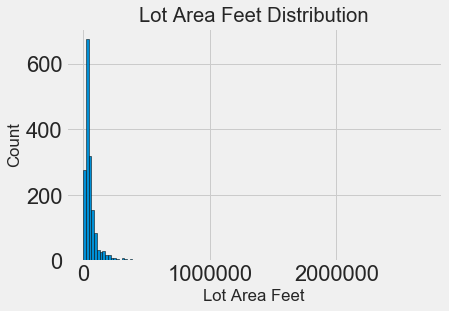

In [13]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotAreaFeet, bins = 125, edgecolor = 'black');
plt.xlabel('Lot Area Feet'); 
plt.ylabel('Count'); plt.title('Lot Area Feet Distribution');

In [14]:
data['LotAreaFeet'].describe()

count    1.719000e+03
mean     7.096325e+04
std      1.327859e+05
min      6.540000e+02
25%      2.526700e+04
50%      4.046000e+04
75%      6.722800e+04
max      2.700340e+06
Name: LotAreaFeet, dtype: float64

In [15]:
data['LotAreaFeet'].dropna().sort_values().tail(10)

1709     805021
1710     840168
1711     850240
1712     967880
1713    1130588
1714    1172710
1715    1309094
1716    1404630
1717    2223654
1718    2700340
Name: LotAreaFeet, dtype: int64

In [16]:
data.loc[data['LotAreaFeet'] ==2700340, :]

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
1718,1719,2700340,5510652.0,5510652.0,R7-2/C1-7,9835083,2700340,2700340,43751,16391,0-220,13237,43751,100-100,8942176,2755326,2697688,0.090788


In [17]:

# Calculate first and third quartile
first_quartile = data['LotAreaFeet'].describe()['25%']
third_quartile = data['LotAreaFeet'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['LotAreaFeet'] > (first_quartile - 3 * iqr)) &
            (data['LotAreaFeet'] < (third_quartile + 3 * iqr))]

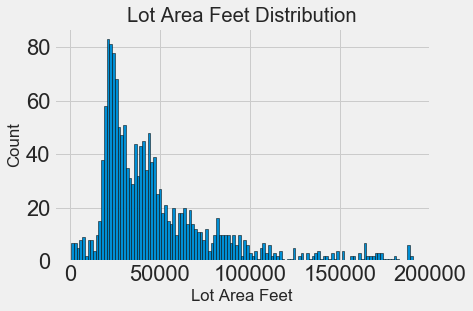

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotAreaFeet, bins = 125, edgecolor = 'black');
plt.xlabel('Lot Area Feet'); 
plt.ylabel('Count'); plt.title('Lot Area Feet Distribution');

In [19]:
data[data!=0]

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6.0,220-220,3.0,13-13,100-100,NaN,70928.0,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,NaN,0-0,NaN,43559,100-100,NaN,23220.0,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9.0,641-641,8.0,32-32,100-100,1402000.0,274922.0,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16.0,0-0,NaN,21-21,100-100,85956.0,322641.0,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76.0,641-641,66.0,40-40,50-50,NaN,37696.0,13902,1.000000
5,6,1583,7766.0,7766.0,R8--/R8-B/R10--,7766,1517,1583,0-10,12.0,256-0,11.0,0-10,100-0,328352.0,21988.0,22944,-41.280711
6,7,2092,16738.0,16738.0,M2-3,16738,2092,2092,13-13,NaN,0-0,NaN,13-13,100-100,NaN,174201.0,2090,1.000000
7,8,2285,27733.0,27733.0,M2-3,27733,2285,2285,13-13,NaN,0-0,NaN,13-13,100-100,NaN,322803.0,2651,1.000000
8,9,2326,78469.0,78469.0,C5-2,78469,1961,1961,40-40,130.0,641-641,315.0,40-40,40-40,14427.0,21460.0,2324,0.816144
9,10,2474,78846.0,78846.0,C4-6,86924,2173,2173,40-40,144.0,641-641,341.0,40-40,40-40,200.0,23190.0,2472,0.997699


In [20]:
# Calculate first and third quartile
first_quartile = data['LotAreaFeet'].describe()['25%']
third_quartile = data['LotAreaFeet'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['LotAreaFeet'] > (first_quartile - 3 * iqr)) &
            (data['LotAreaFeet'] < (third_quartile + 3 * iqr))]

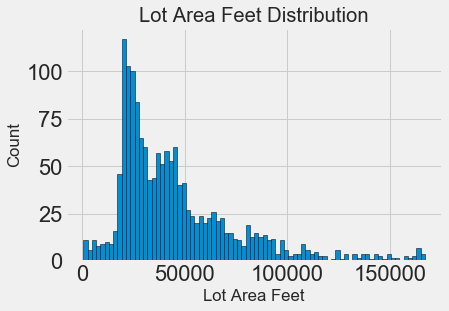

In [21]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotAreaFeet, bins = 80, edgecolor = 'black');
plt.xlabel('Lot Area Feet'); 
plt.ylabel('Count'); plt.title('Lot Area Feet Distribution');

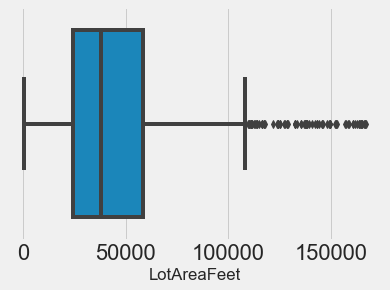

In [22]:
import seaborn as sns
sns.boxplot(x=data['LotAreaFeet'])

In [23]:
#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
#all(axis=1) ensures that for each row, all column satisfy the constraint.
#Finally, result of this condition is used to index the dataframe. 
#assuming distribution X with mean mu and standard deviation sigma, the z score measures how many sigmas a value is from mu. algebraically: z-score = (x - mu) / sigma. The 3 is the threshold in number of standard deviations away from the mean

df = pd.DataFrame(np.random.randn(100, 3))
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,0,1,2
0,-0.828571,0.205580,0.618958
1,0.836629,0.011935,1.276751
2,0.245938,0.082009,-0.347888
3,0.049689,-0.863958,-0.865703
4,-0.540861,0.905147,1.538665
5,-2.128334,-0.248390,0.637985
6,0.255341,-0.722729,-0.684557
7,0.709062,0.836976,1.758840
8,1.026940,-1.761373,1.332655
9,0.242965,-0.426612,1.939470


In [24]:

data['LotAreaFeet']

0          654
1          780
2         1151
3         1274
4         1464
5         1583
6         2092
7         2285
8         2326
9         2474
10        2574
11        3324
12        3350
13        3426
14        3868
15        4259
16        4281
17        4848
18        5075
19        5290
20        5610
21        6028
22        6064
23        6215
24        6246
25        6486
26        6651
27        6878
28        7330
29        7562
         ...  
1562    145476
1563    145974
1564    147758
1565    148982
1566    149276
1567    149334
1568    149448
1569    151830
1570    152127
1571    152372
1572    152686
1573    156766
1574    157178
1575    158332
1576    158716
1577    160350
1578    160722
1579    161474
1580    162712
1581    163406
1582    163618
1583    163982
1584    164394
1585    164456
1586    164728
1587    164806
1588    166136
1589    166224
1590    166666
1591    166891
Name: LotAreaFeet, Length: 1592, dtype: int64

In [25]:
pd.read_csv('ny_building.csv')

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6,220-220,3,13-13,100-100,0,70928,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,0,0-0,0,43559,100-100,0,23220,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9,641-641,8,32-32,100-100,1402000,274922,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16,0-0,0,21-21,100-100,85956,322641,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76,641-641,66,40-40,50-50,0,37696,13902,1.000000
5,6,1583,7766.0,7766.0,R8--/R8-B/R10--,7766,1517,1583,0-10,12,256-0,11,0-10,100-0,328352,21988,22944,-41.280711
6,7,2092,16738.0,16738.0,M2-3,16738,2092,2092,13-13,0,0-0,0,13-13,100-100,0,174201,2090,1.000000
7,8,2285,27733.0,27733.0,M2-3,27733,2285,2285,13-13,0,0-0,0,13-13,100-100,0,322803,2651,1.000000
8,9,2326,78469.0,78469.0,C5-2,78469,1961,1961,40-40,130,641-641,315,40-40,40-40,14427,21460,2324,0.816144
9,10,2474,78846.0,78846.0,C4-6,86924,2173,2173,40-40,144,641-641,341,40-40,40-40,200,23190,2472,0.997699


In [26]:
data['LotAreaFeet']

0          654
1          780
2         1151
3         1274
4         1464
5         1583
6         2092
7         2285
8         2326
9         2474
10        2574
11        3324
12        3350
13        3426
14        3868
15        4259
16        4281
17        4848
18        5075
19        5290
20        5610
21        6028
22        6064
23        6215
24        6246
25        6486
26        6651
27        6878
28        7330
29        7562
         ...  
1562    145476
1563    145974
1564    147758
1565    148982
1566    149276
1567    149334
1568    149448
1569    151830
1570    152127
1571    152372
1572    152686
1573    156766
1574    157178
1575    158332
1576    158716
1577    160350
1578    160722
1579    161474
1580    162712
1581    163406
1582    163618
1583    163982
1584    164394
1585    164456
1586    164728
1587    164806
1588    166136
1589    166224
1590    166666
1591    166891
Name: LotAreaFeet, Length: 1592, dtype: int64

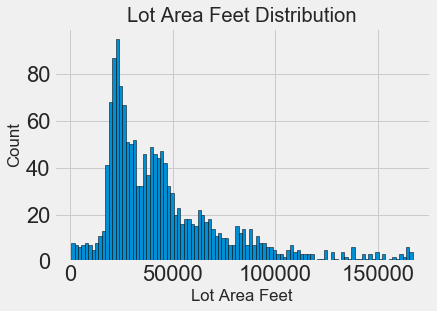

In [27]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotAreaFeet, bins = 100, edgecolor = 'black');
plt.xlabel('Lot Area Feet'); 
plt.ylabel('Count'); plt.title('Lot Area Feet Distribution');

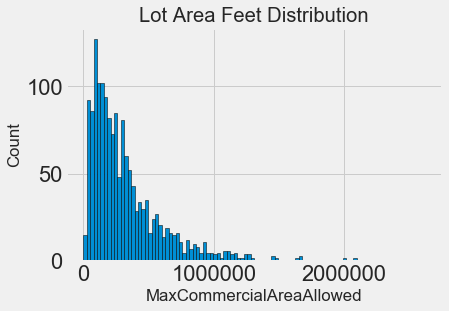

In [28]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxCommercialAreaAllowed, bins = 100, edgecolor = 'black');
plt.xlabel('MaxCommercialAreaAllowed'); 
plt.ylabel('Count'); plt.title('Lot Area Feet Distribution');

In [29]:
# Calculate first and third quartile
first_quartile = data['MaxCommercialAreaAllowed'].describe()['25%']
third_quartile = data['MaxCommercialAreaAllowed'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['MaxCommercialAreaAllowed'] > (first_quartile - 3 * iqr)) &
            (data['MaxCommercialAreaAllowed'] < (third_quartile + 3 * iqr))]

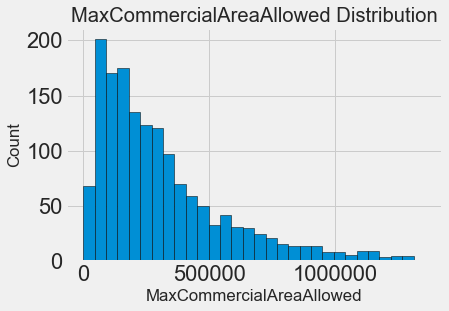

In [30]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxCommercialAreaAllowed, bins = 30, edgecolor = 'black');
plt.xlabel('MaxCommercialAreaAllowed'); 
plt.ylabel('Count'); plt.title('MaxCommercialAreaAllowed Distribution');

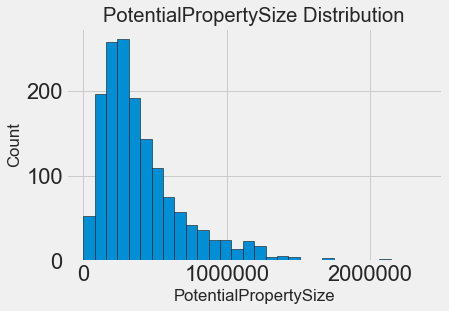

In [31]:
plt.style.use('fivethirtyeight')
plt.hist(data.PotentialPropertySize, bins = 30, edgecolor = 'black');
plt.xlabel('PotentialPropertySize'); 
plt.ylabel('Count'); plt.title('PotentialPropertySize Distribution');

In [32]:
# Calculate first and third quartile
first_quartile = data['PotentialPropertySize'].describe()['25%']
third_quartile = data['PotentialPropertySize'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['PotentialPropertySize'] > (first_quartile - 3 * iqr)) &
            (data['PotentialPropertySize'] < (third_quartile + 3 * iqr))]

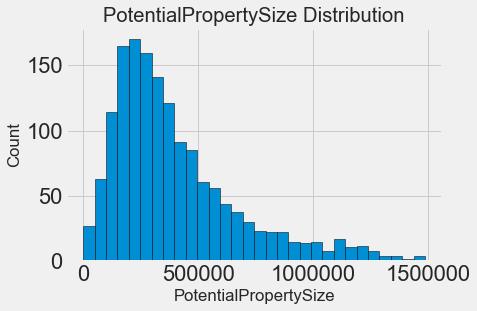

In [33]:
plt.style.use('fivethirtyeight')
plt.hist(data.PotentialPropertySize, bins = 30, edgecolor = 'black');
plt.xlabel('PotentialPropertySize'); 
plt.ylabel('Count'); plt.title('PotentialPropertySize Distribution');

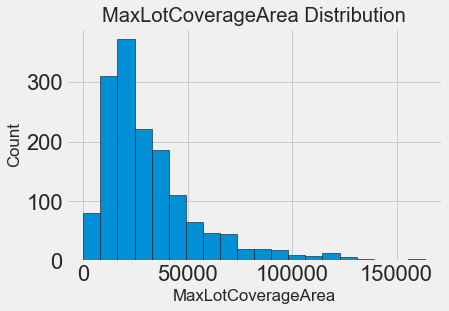

In [34]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxLotCoverageArea, bins = 20, edgecolor = 'black');
plt.xlabel('MaxLotCoverageArea'); 
plt.ylabel('Count'); plt.title('MaxLotCoverageArea Distribution');

In [35]:
# Calculate first and third quartile
first_quartile = data['MaxLotCoverageArea'].describe()['25%']
third_quartile = data['MaxLotCoverageArea'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['MaxLotCoverageArea'] > (first_quartile - 3 * iqr)) &
            (data['MaxLotCoverageArea'] < (third_quartile + 3 * iqr))]

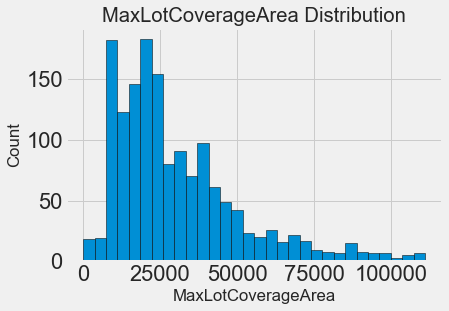

In [36]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxLotCoverageArea, bins = 30, edgecolor = 'black');
plt.xlabel('MaxLotCoverageArea'); 
plt.ylabel('Count'); plt.title('MaxLotCoverageArea Distribution');

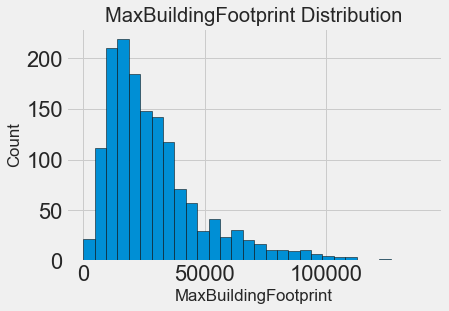

In [37]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxBuildingFootprint, bins = 30, edgecolor = 'black');
plt.xlabel('MaxBuildingFootprint'); 
plt.ylabel('Count'); plt.title('MaxBuildingFootprint Distribution');

In [38]:
 # Calculate first and third quartile
first_quartile = data['MaxBuildingFootprint'].describe()['25%']
third_quartile = data['MaxBuildingFootprint'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['MaxBuildingFootprint'] > (first_quartile - 3 * iqr)) &
            (data['MaxBuildingFootprint'] < (third_quartile + 3 * iqr))]

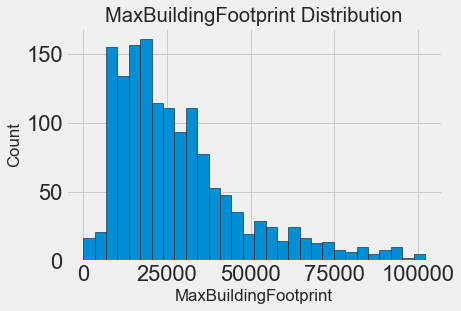

In [39]:
plt.style.use('fivethirtyeight')
plt.hist(data.MaxBuildingFootprint, bins = 30, edgecolor = 'black');
plt.xlabel('MaxBuildingFootprint'); 
plt.ylabel('Count'); plt.title('MaxBuildingFootprint Distribution');

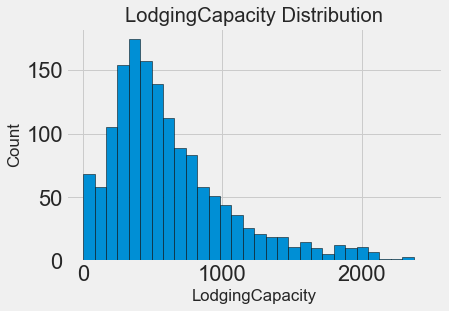

In [40]:
plt.style.use('fivethirtyeight')
plt.hist(data.LodgingCapacity, bins = 30, edgecolor = 'black');
plt.xlabel('LodgingCapacity'); 
plt.ylabel('Count'); plt.title('LodgingCapacity Distribution');

In [41]:
 # Calculate first and third quartile
first_quartile = data['LodgingCapacity'].describe()['25%']
third_quartile = data['LodgingCapacity'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['LodgingCapacity'] > (first_quartile - 3 * iqr)) &
            (data['LodgingCapacity'] < (third_quartile + 3 * iqr))]

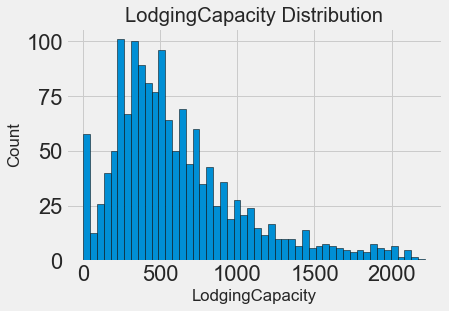

In [42]:
plt.style.use('fivethirtyeight')
plt.hist(data.LodgingCapacity, bins = 50, edgecolor = 'black');
plt.xlabel('LodgingCapacity'); 
plt.ylabel('Count'); plt.title('LodgingCapacity Distribution');

In [43]:
pwd

'C:\\Users\\cgage\\Documents'

In [44]:
cd /Users/cgage/Documents

C:\Users\cgage\Documents


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
pd.read_csv('ny_building.csv')
data.head()

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6,220-220,3,13-13,100-100,0,70928,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,0,0-0,0,43559,100-100,0,23220,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9,641-641,8,32-32,100-100,1402000,274922,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16,0-0,0,21-21,100-100,85956,322641,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76,641-641,66,40-40,50-50,0,37696,13902,1.000000


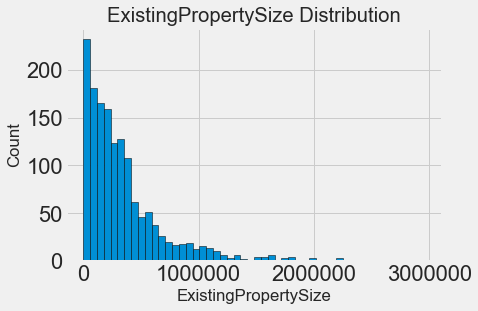

In [47]:
plt.style.use('fivethirtyeight')
plt.hist(data.ExistingPropertySize, bins = 50, edgecolor = 'black');
plt.xlabel('ExistingPropertySize'); 
plt.ylabel('Count'); plt.title('ExistingPropertySize Distribution');

In [48]:
 # Calculate first and third quartile
first_quartile = data['ExistingPropertySize'].describe()['25%']
third_quartile = data['ExistingPropertySize'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['ExistingPropertySize'] > (first_quartile - 3 * iqr)) &
            (data['ExistingPropertySize'] < (third_quartile + 3 * iqr))]

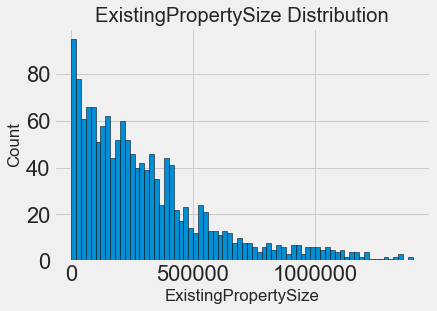

In [49]:
plt.style.use('fivethirtyeight')
plt.hist(data.ExistingPropertySize, bins = 70, edgecolor = 'black');
plt.xlabel('ExistingPropertySize'); 
plt.ylabel('Count'); plt.title('ExistingPropertySize Distribution');

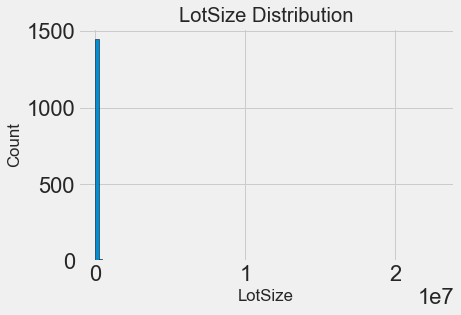

In [50]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotSize, bins = 100, edgecolor = 'black');
plt.xlabel('LotSize'); 
plt.ylabel('Count'); plt.title('LotSize Distribution');

In [51]:
 # Calculate first and third quartile
first_quartile = data['LotSize'].describe()['25%']
third_quartile = data['LotSize'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['LotSize'] > (first_quartile - 3 * iqr)) &
            (data['LotSize'] < (third_quartile + 3 * iqr))]

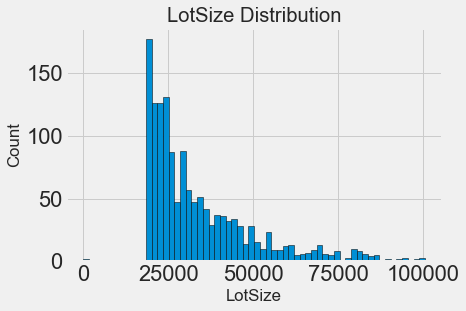

In [52]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotSize, bins = 60, edgecolor = 'black');
plt.xlabel('LotSize'); 
plt.ylabel('Count'); plt.title('LotSize Distribution');

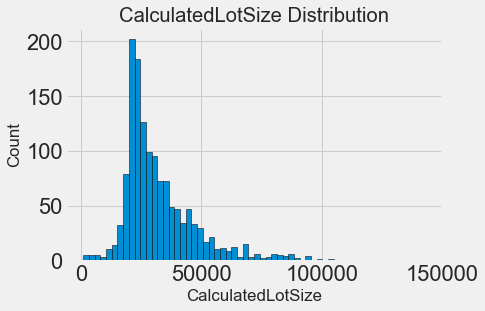

In [53]:
plt.style.use('fivethirtyeight')
plt.hist(data.CalculatedLotSize, bins = 60, edgecolor = 'black');
plt.xlabel('CalculatedLotSize'); 
plt.ylabel('Count'); plt.title('CalculatedLotSize Distribution');

In [54]:
 # Calculate first and third quartile
first_quartile = data['CalculatedLotSize'].describe()['25%']
third_quartile = data['CalculatedLotSize'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['CalculatedLotSize'] > (first_quartile - 3 * iqr)) &
            (data['CalculatedLotSize'] < (third_quartile + 3 * iqr))]

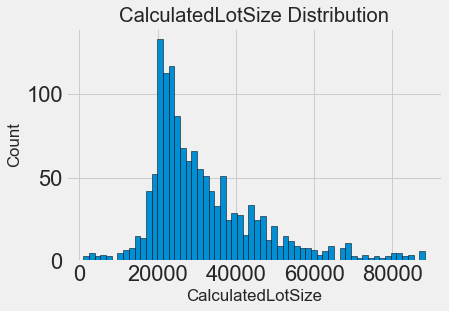

In [55]:
plt.style.use('fivethirtyeight')
plt.hist(data.CalculatedLotSize, bins = 60, edgecolor = 'black');
plt.xlabel('CalculatedLotSize'); 
plt.ylabel('Count'); plt.title('CalculatedLotSize Distribution');

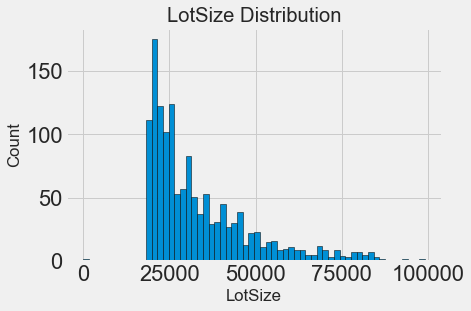

In [56]:
plt.style.use('fivethirtyeight')
plt.hist(data.LotSize, bins = 60, edgecolor = 'black');
plt.xlabel('LotSize'); 
plt.ylabel('Count'); plt.title('LotSize Distribution');

In [57]:
#delta between lot size and Calc lot size is significant on the front end. More small building parcels can be developed?

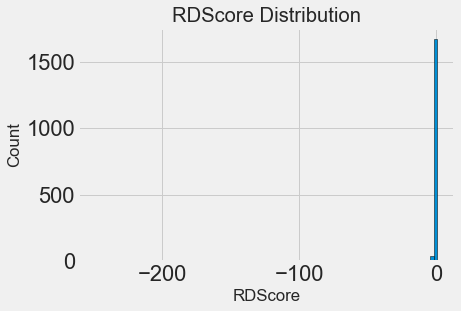

In [118]:
plt.style.use('fivethirtyeight')
plt.hist(data.RDScore, bins = 100, edgecolor = 'black');
plt.xlabel('RDScore'); 
plt.ylabel('Count'); plt.title('RDScore Distribution');

In [119]:
#no significance, just testing normality of RDScore for outliers

In [120]:
 # Calculate first and third quartile
first_quartile = data['RDScore'].describe()['25%']
third_quartile = data['RDScore'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['RDScore'] > (first_quartile - 3 * iqr)) &
            (data['RDScore'] < (third_quartile + 3 * iqr))]

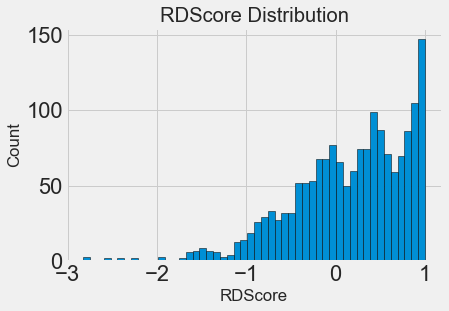

In [121]:
plt.style.use('fivethirtyeight')
plt.hist(data.RDScore, bins = 50, edgecolor = 'black');
plt.xlabel('RDScore'); 
plt.ylabel('Count'); plt.title('RDScore Distribution');

In [122]:
#more normal distribution after first and third quartile data is removed
#score outliers seem to most be represented <-1

In [123]:
data['RDScore'].describe()
#>=3rd quartile "good score"

count    1704.000000
mean        0.143068
std         0.655869
min        -2.826478
25%        -0.249896
50%         0.257687
75%         0.666294
max         1.000000
Name: RDScore, dtype: float64

In [124]:
data['RDScore'].dropna().sort_values().tail(10)

1295    1.0
18      1.0
809     1.0
1610    1.0
1398    1.0
1663    1.0
1612    1.0
17      1.0
7       1.0
924     1.0
Name: RDScore, dtype: float64

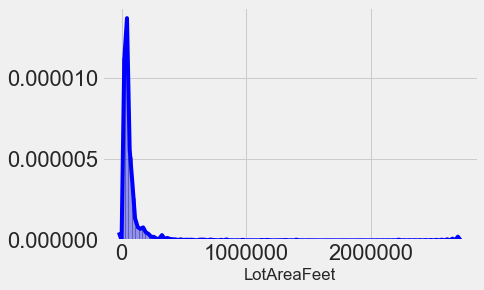

In [125]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data['LotAreaFeet'], hist=True, kde=True, 
             bins=int(100), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
cd /Users/cgage/Documents

C:\Users\cgage\Documents


In [68]:
data = pd.read_csv('ny_building.csv')

In [69]:
data.head(5)

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,zoneClass,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,PrincipalMaxHeight,LodgingCapacity,DensityNet,DensityUnits,TotalBuidingHeight,LotCoverage,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
0,1,654,1276.0,1276.0,C2-6,4147,637,654,13-13,6,220-220,3,13-13,100-100,0,70928,72633,-0.205691
1,2,780,3123.0,3123.0,M3-2,3123,780,780,43559,0,0-0,0,43559,100-100,0,23220,988,1.000000
2,3,1151,5610.0,5610.0,R10--,5610,560,852,21-21,9,641-641,8,32-32,100-100,1402000,274922,567267,-248.910873
3,4,1274,10195.0,10195.0,M1-5,10195,1274,1274,21-21,16,0-0,0,21-21,100-100,85956,322641,1250,-7.431192
4,5,1464,45891.0,45891.0,C5-5,45891,1147,1147,40-40,76,641-641,66,40-40,50-50,0,37696,13902,1.000000


In [70]:
print('The shape of our features is:', data.shape)

The shape of our features is: (1719, 18)


In [71]:
# Descriptive statistics for each column
data.describe()

,FolioNumber,LotAreaFeet,MaxCommercialAreaAllowed,MaxOfficeAreaAllowed,PotentialPropertySize,MaxLotCoverageArea,MaxBuildingFootprint,LodgingCapacity,DensityUnits,ExistingPropertySize,LotSize,CalculatedLotSize,RDScore
count,1719.000000,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1.719000e+03,1719.000000,1719.000000,1.719000e+03,1.719000e+03,1.719000e+03,1719.000000
mean,860.000000,7.096325e+04,4.698171e+05,4.698171e+05,6.201980e+05,5.313818e+04,5.301086e+04,924.165212,680.897033,4.009797e+05,7.555179e+04,5.462839e+04,-0.069613
std,496.376873,1.327859e+05,8.766826e+05,8.766826e+05,1.046188e+06,1.124793e+05,1.177810e+05,1594.433329,1366.111543,5.320524e+05,5.593995e+05,1.042861e+05,6.145184
min,1.000000,6.540000e+02,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,9.880000e+02,-248.910873
25%,430.500000,2.526700e+04,1.339095e+05,1.339095e+05,2.149440e+05,1.720650e+04,1.615250e+04,329.000000,211.000000,1.088445e+05,2.344300e+04,2.290050e+04,-0.266602
50%,860.000000,4.046000e+04,2.632680e+05,2.632680e+05,3.575550e+05,2.764700e+04,2.677800e+04,550.000000,383.000000,2.572470e+05,3.230800e+04,3.091800e+04,0.251307
75%,1289.500000,6.722800e+04,5.034005e+05,5.034005e+05,6.341385e+05,4.893500e+04,4.673650e+04,978.000000,699.000000,4.904585e+05,5.678250e+04,5.080600e+04,0.658362
max,1719.000000,2.700340e+06,1.725727e+07,1.725727e+07,1.725727e+07,2.700340e+06,2.700340e+06,28760.000000,20954.000000,8.942176e+06,2.277234e+07,2.697688e+06,1.000000


In [133]:
#Beginning of one-hot encoding process
missing_values_count = data.isnull().sum()
missing_values_count[0:2000]

FolioNumber                 0
LotAreaFeet                 0
MaxCommercialAreaAllowed    0
MaxOfficeAreaAllowed        0
zoneClass                   0
PotentialPropertySize       0
MaxLotCoverageArea          0
MaxBuildingFootprint        0
PrincipalMaxHeight          0
LodgingCapacity             0
DensityNet                  0
DensityUnits                0
TotalBuidingHeight          0
LotCoverage                 0
ExistingPropertySize        0
LotSize                     0
CalculatedLotSize           0
RDScore                     0
dtype: int64

In [134]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

0.0

In [136]:
#features = pd.read_csv('ny_building.csv')*took out one hot encode
# One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
#features.iloc[:,2:].head(10)

In [137]:
# Labels are the values I'm going to predict
labels = np.array(features['LotAreaFeet'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('LotAreaFeet', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [138]:
#Split the data into testing and training sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [139]:
#Look at shape of data to make sure the training features number of columns match the testing feature number of columns. 
#The number of rows match for the respective training and testing features and labels
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1289, 662)
Training Labels Shape: (1289,)
Testing Features Shape: (430, 662)
Testing Labels Shape: (430,)


In [140]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('MaxCommercialAreaAllowed')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  366661.0 degrees.


In [141]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [143]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1080.87 degrees.


In [144]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.62 %.


In [111]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [147]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [148]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 16


In [149]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

In [150]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FolioNumber          Importance: 0.86
Variable: MaxLotCoverageArea   Importance: 0.02
Variable: MaxBuildingFootprint Importance: 0.02
Variable: LotSize              Importance: 0.02
Variable: CalculatedLotSize    Importance: 0.02
Variable: PotentialPropertySize Importance: 0.01
Variable: LodgingCapacity      Importance: 0.01
Variable: ExistingPropertySize Importance: 0.01
Variable: MaxCommercialAreaAllowed Importance: 0.0
Variable: MaxOfficeAreaAllowed Importance: 0.0
Variable: DensityUnits         Importance: 0.0
Variable: RDScore              Importance: 0.0
Variable: zoneClass_C1-6       Importance: 0.0
Variable: zoneClass_C1-6/R6--  Importance: 0.0
Variable: zoneClass_C1-6A      Importance: 0.0
Variable: zoneClass_C1-6A/C1-7A Importance: 0.0
Variable: zoneClass_C1-6A/R7-B Importance: 0.0
Variable: zoneClass_C1-6A/R8-A Importance: 0.0
Variable: zoneClass_C1-7       Importance: 0.0
Variable: zoneClass_C1-7/C1-6A Importance: 0.0
Variable: zoneClass_C1-7/C6-2/R7-2 Importance:

In [151]:
#importance of folio number not relevant

In [153]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('MaxLotCoverageArea'), feature_list.index('MaxBuildingFootprint')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 21078.94 degrees.
Accuracy: 59.65 %.


In [154]:
#much lower accuracy on the two most important variables (features)

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');